from fastai.vision.all import *
from nbdev.showdoc import *

In [66]:
%matplotlib inline
set_seed(2)
torch.cuda.set_device(2)
bs = 16

In [44]:
from fastai.vision.all import *
from nbdev.showdoc import *
#Get Data

In [45]:
#Dataloader
path= Path('data')


In [46]:
get_image_files(path)

(#11078) [Path('data/nonsegmentedv2/Common Chickweed/248.png'),Path('data/nonsegmentedv2/Common Chickweed/672.png'),Path('data/nonsegmentedv2/Common Chickweed/632.png'),Path('data/nonsegmentedv2/Common Chickweed/416.png'),Path('data/nonsegmentedv2/Common Chickweed/15.png'),Path('data/nonsegmentedv2/Common Chickweed/262.png'),Path('data/nonsegmentedv2/Common Chickweed/448.png'),Path('data/nonsegmentedv2/Common Chickweed/370.png'),Path('data/nonsegmentedv2/Common Chickweed/242.png'),Path('data/nonsegmentedv2/Common Chickweed/468.png')...]

In [47]:
#data loader
plants=DataBlock(
      blocks= (ImageBlock, CategoryBlock),
      get_items= get_image_files,
      splitter = RandomSplitter(valid_pct=0.2, seed=42),
      get_y=parent_label,
      item_tfms= Resize(224)

)
dls = plants.dataloaders(path)



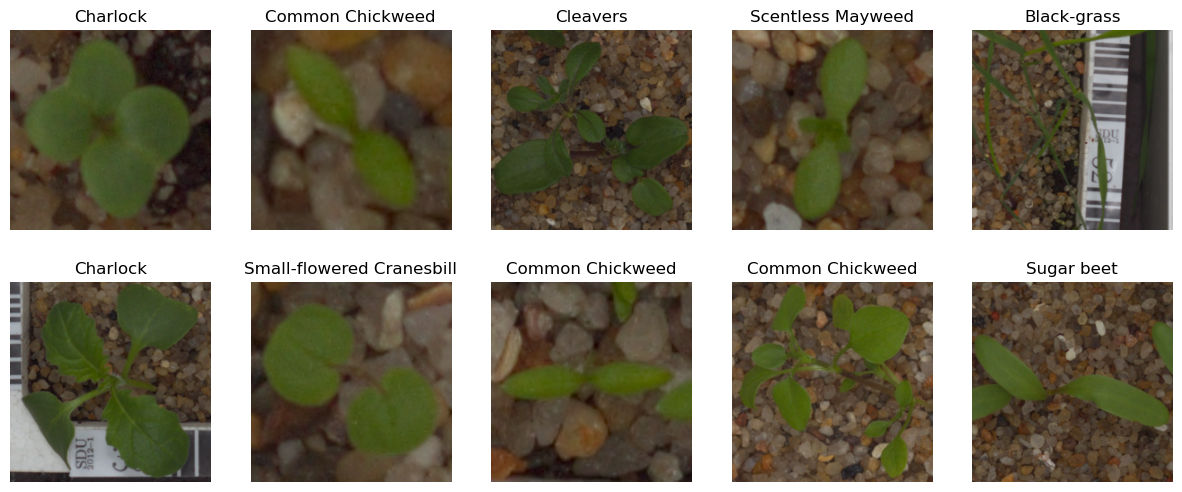

In [48]:
dls.valid.show_batch(max_n=10,nrows=2)

In [49]:
dls.vocab

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'ShepherdтАЩs Purse', 'Small-flowered Cranesbill', 'Sugar beet']

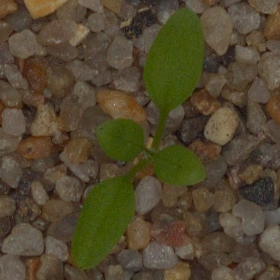

In [50]:
img = PILImage.create(get_image_files(path)[1])
img


In [52]:
aug_transforms??

In [53]:
learner = cnn_learner(dls, resnet50, metrics=error_rate) #.to_fp16()

SuggestedLRs(valley=0.0010000000474974513)

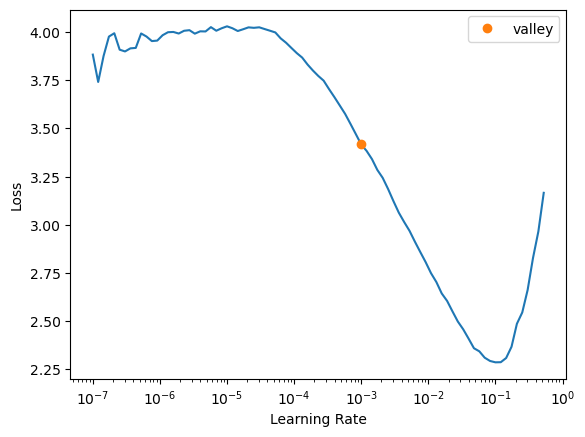

In [54]:
learner.lr_find()

In [55]:
learner.fit_one_cycle(8, lr_max=0.0025)

epoch,train_loss,valid_loss,error_rate,time
0,0.747867,0.256527,0.085779,00:15
1,0.275689,0.227987,0.074944,00:16
2,0.157736,0.115370,0.041084,00:15
3,0.117637,0.117528,0.041084,00:15
4,0.063863,0.086259,0.020316,00:15
5,0.029688,0.044545,0.012190,00:15
6,0.009655,0.040919,0.009029,00:15
7,0.007236,0.041213,0.009029,00:15


In [56]:
print("Accuracy: ", 1-float(learner.recorder.metrics[0].value))

Accuracy:  0.9909706544131041


In [68]:
learner.save('resnet50')

Path('models/resnet50.pth')

In [63]:
interpretation = ClassificationInterpretation.from_learner(learner)

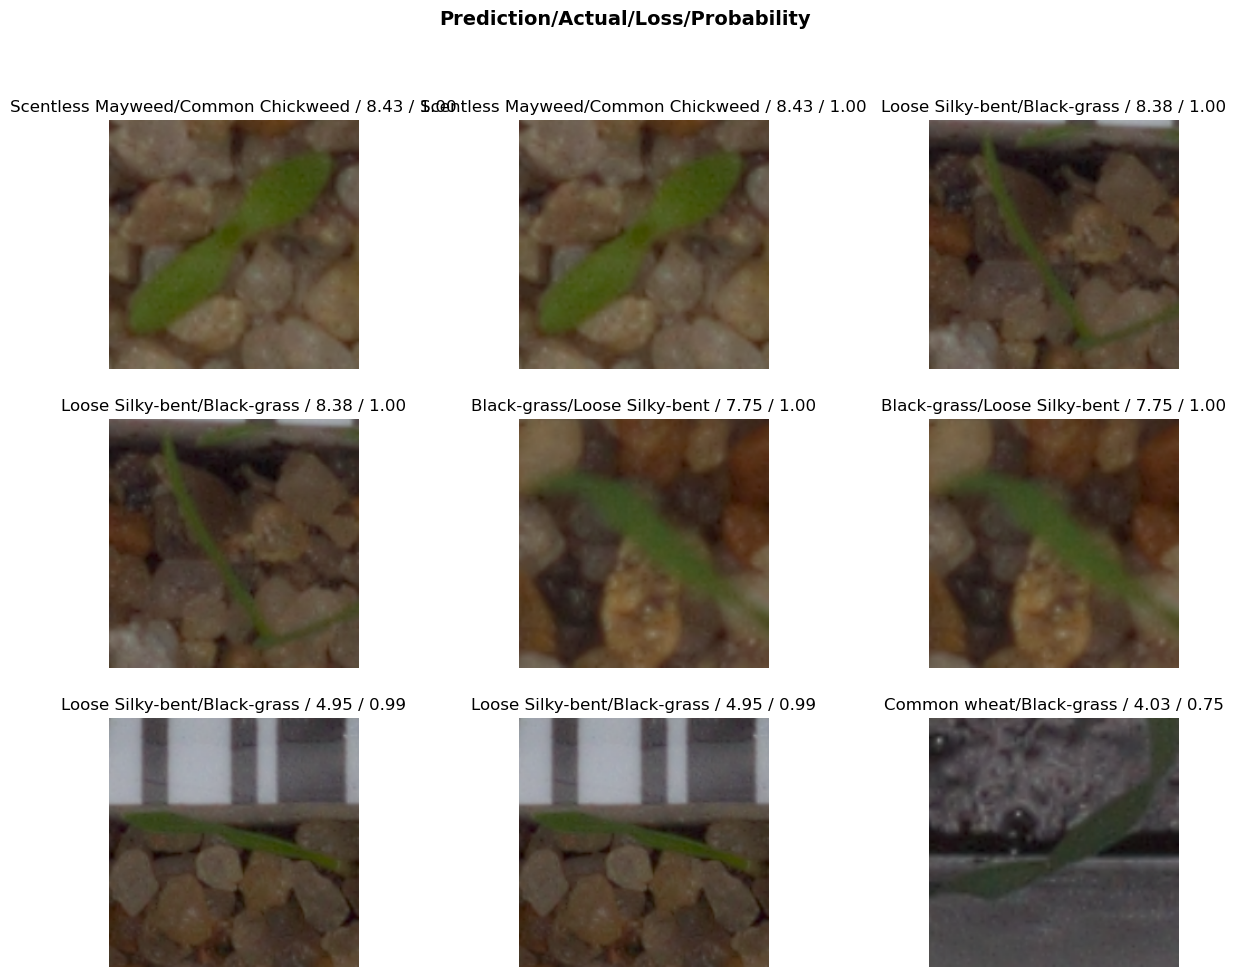

In [69]:
interpretation.plot_top_losses(9, figsize=(15,11))

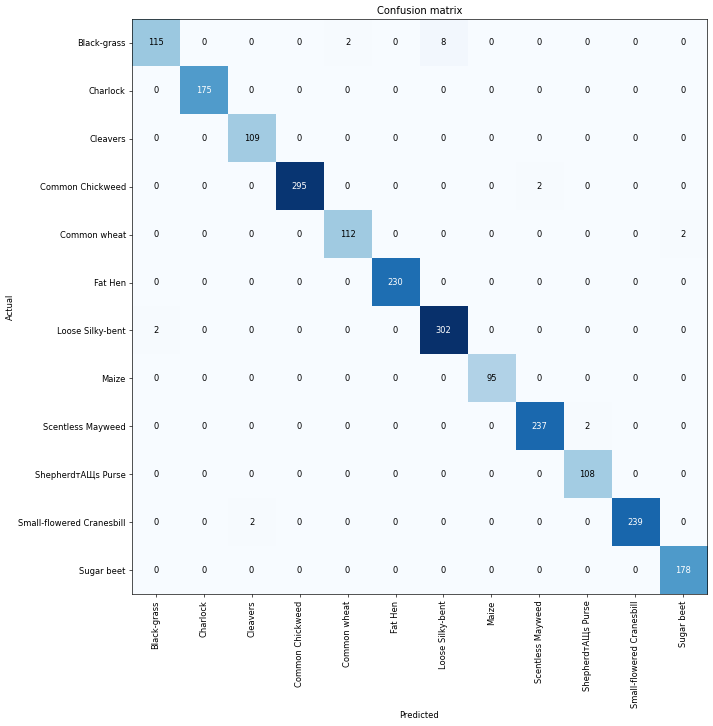

In [70]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [64]:
interpretation.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 8),
 ('Black-grass', 'Common wheat', 2),
 ('Common Chickweed', 'Scentless Mayweed', 2),
 ('Common wheat', 'Sugar beet', 2),
 ('Loose Silky-bent', 'Black-grass', 2),
 ('Scentless Mayweed', 'ShepherdтАЩs Purse', 2),
 ('Small-flowered Cranesbill', 'Cleavers', 2)]

In [62]:
img = PILImage.create(get_image_files(path)[710])
img
label,_,probs = learner.predict(img)
print(label.split('/')[-1])
print(max(probs))

Common Chickweed
TensorBase(1.0000)
